# Markowitz Portfolio Optimization


In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
%matplotlib inline

Start by entering a stock ticker.

In [2]:
ticker=input("Please enter a ticker ")
assets=[ticker, '^GSPC']
pf_data = pd.DataFrame()
for a in assets:
    pf_data[a]=wb.DataReader(a, data_source='yahoo', start='2010-1-1')['Adj Close']

Please enter a ticker PG


The following graph shows the change in stock price of the stock normalized to 100 and compared to the market.

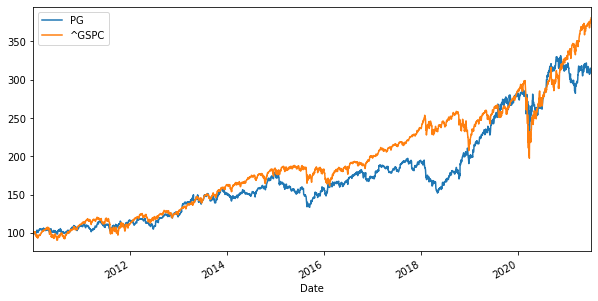

In [3]:
(pf_data/pf_data.iloc[0]*100).plot(figsize=(10,5));

In [4]:
log_returns=np.log(pf_data/pf_data.shift(1))

In [5]:
log_returns.mean()*250;

The following cell calculates the covariance between the stock and the market.

In [8]:
log_returns.cov()*250

,PG,^GSPC
PG,0.029002,0.017402
^GSPC,0.017402,0.030058


The following cell calculates the correlation between the stock and the market.


In [9]:
log_returns.corr()

,PG,^GSPC
PG,1.000000,0.589399
^GSPC,0.589399,1.000000


In [10]:
num_assets=len(assets)

In [11]:
pfolio_returns=[]
pfolio_volatilities=[]
for x in range(1000):
    weights=np.random.random(num_assets)
    weights/=np.sum(weights)
    pfolio_returns.append(np.sum(weights*log_returns.mean()*250))
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T, np.dot(log_returns.cov()*250, weights))))
pfolio_returns=np.array(pfolio_returns)
pfolio_volatilities=np.array(pfolio_volatilities)

In [12]:
portfolios=pd.DataFrame({'Return':pfolio_returns, 'Volatility':pfolio_volatilities})

- The following graph displays the efficient frontier.
- This graph represents optimal weight ratios between the stock and the market.
- All weight ratios below the leftmost point are unoptimal as they have higher risk but less reward than the lowest risk option.

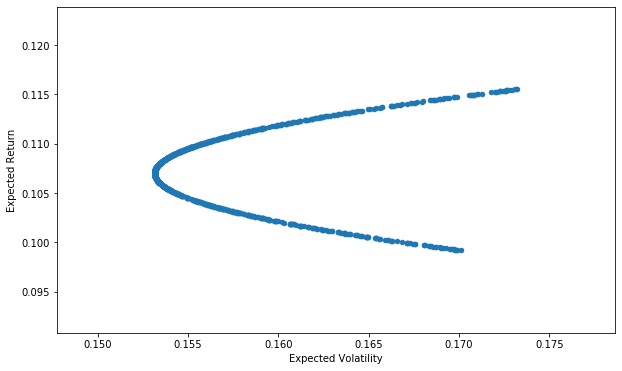

In [13]:
portfolios.plot(x='Volatility', y='Return', kind='scatter', figsize=(10,6))
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return');

# Sharpe Ratio Calculation

In [15]:
tickers=[ticker, '^GSPC']
data = pd.DataFrame()
for t in tickers:
    data[t]=wb.DataReader(t, data_source='yahoo', start='2012-1-1', end='2016-12-31')['Adj Close']

In [16]:
sec_returns=np.log(data/data.shift(1))

In [17]:
cov=sec_returns.cov()*250
cov

,PG,^GSPC
PG,0.020409,0.010078
^GSPC,0.010078,0.016362


In [18]:
cov_with_market=cov.iloc[0,1]
cov_with_market

0.010078079913356347

In [19]:
market_var=sec_returns['^GSPC'].var()*250
market_var

0.016361631002308474

In [20]:
PG_beta=cov_with_market/market_var
PG_beta

0.6159581469557909

In [21]:
PG_er=0.025+PG_beta*0.05
PG_er

0.05579790734778955

In [22]:
Sharpe=(PG_er-0.025)/(sec_returns['PG'].std()*250**0.5)
Sharpe

0.2155812854559248